# Lab 4
# Part 1

Equations:

$$
\phi \xrightarrow[k_1 = 1]{} X
$$ 

$$
X \xrightarrow[k_2 = 2]{} Y
$$

$$
2X + Y \xrightarrow[k_3 = 0.02]{} 3X
$$

$$
X \xrightarrow[k_4 = 0.04]{} \phi
$$

Rate of Formation of X:

$$
\frac{d[X]}{dt} = k_1 = 1
$$

$$
\frac{d[X]}{dt} = -k_2[X] = -2[X]
$$

$$
\frac{d[X]}{dt} = k_3[X]^2[Y] = 0.02[X]^2[Y]
$$

$$
\frac{d[X]}{dt} = k_4[X] = -0.04[X]
$$

Rate of Formation of Y:

$$
\frac{d[Y]}{dt} = 0
$$

$$
\frac{d[Y]}{dt} = k_2[X] = 2[X]
$$

$$
\frac{d[Y]}{dt} = -k_3[X]^2[Y] = -0.02[X]^2[Y]
$$

$$
\frac{d[Y]}{dt} = 0
$$

Differential Equations:

$$
\frac{d[X]}{dt} = 1 - 2.04[X] + 0.02[X]^2[Y]
$$

$$
\frac{d[Y]}{dt} = 2[X] - 0.02[X]^2[Y]
$$

# Part 2

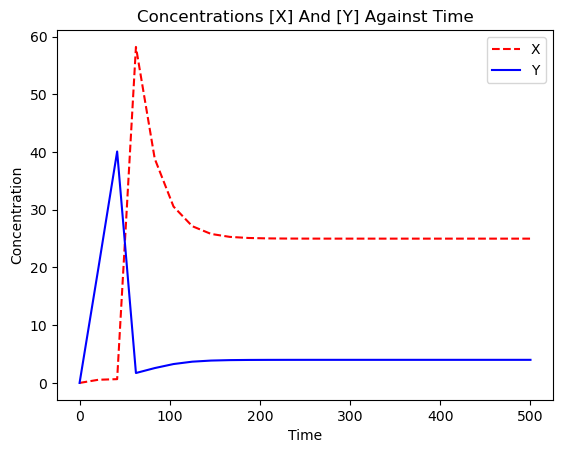

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def diffeq(U, t):
    x, y = U
    
    dxdt = (1-2.04*x + 0.02*(x**2)*y)
    dydt = (2*x - 0.02*(x**2)*y)
    return [dxdt, dydt]
    
# time domain
t_span = np.linspace(0,500,25)

# initial conditions
x = 0
y = 0
initialxy = [x, y]

solution = odeint(diffeq, initialxy, t_span)

# plot
plt.plot(t_span, solution[:, 0], 'r--', label = 'X');
plt.plot(t_span, solution[:, 1], 'b-', label = 'Y');
plt.legend();
plt.title('Concentrations [X] And [Y] Against Time')
plt.xlabel('Time');
plt.ylabel('Concentration');

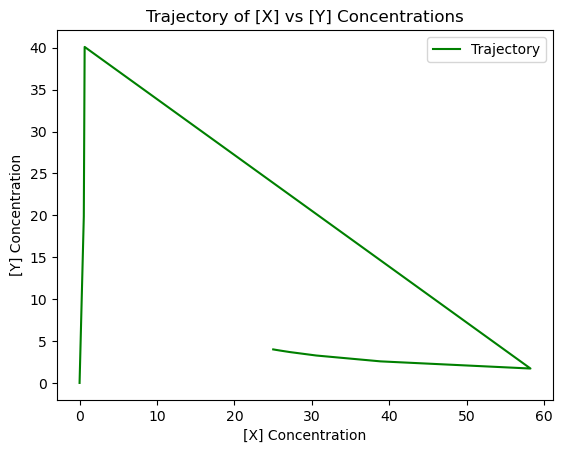

In [3]:
# trajectory plot
plt.plot(solution[:, 0], solution[:, 1], 'g', label = 'Trajectory');
plt.legend();
plt.title('Trajectory of [X] vs [Y] Concentrations');
plt.xlabel('[X] Concentration');
plt.ylabel('[Y] Concentration');

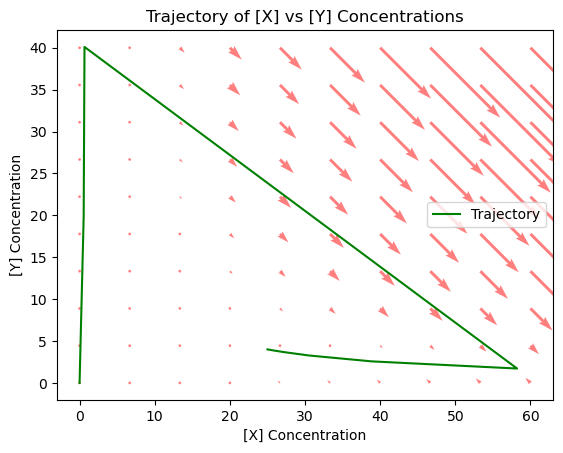

In [4]:
# trajectory plot
plt.plot(solution[:, 0], solution[:, 1], 'g', label = 'Trajectory')
plt.legend();
plt.title('Trajectory of [X] vs [Y] Concentrations')
plt.xlabel('[X] Concentration')
plt.ylabel('[Y] Concentration')

# direction field
X, Y = np.meshgrid(np.linspace(0, 60, 10), np.linspace(0, 40, 10))
U = 1 - 2.04*X + 0.02*(X**2)*Y
V = 2*X - 0.02*(X**2)*Y
plt.quiver(X, Y, U, V, color='r', alpha=0.5)

plt.show()

As the concentration of X increases, the concentration of Y decreases. A higher starting concentration of Y decreases faster than a lower concentration of Y as X increases.

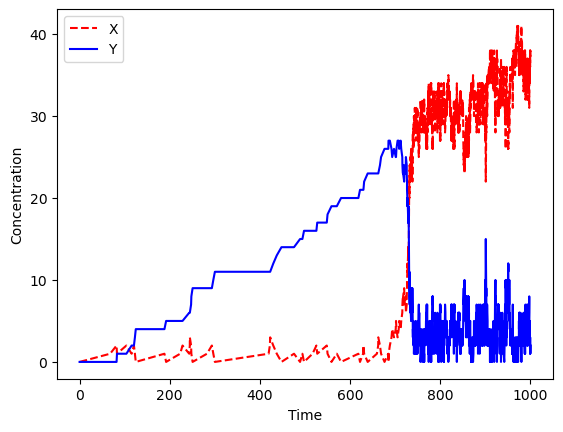

In [32]:
import random
import numpy as np

t = [0]
X = [0]
Y = [0]

tend = 1000

k1 = 1
k2 = 2 
k3 = 0.02 
k4 = 0.04

while t[-1] < tend:
    
    current_X = X[-1]
    current_Y = Y[-1]
    
    #not sure about the rates
    rates = [k1, k2 * current_X, k3 * current_X * (current_X - 1) * current_Y, k4 * current_X]
    #rates = [k1,k2,k3,k4]
    rate_sum = sum(rates)
    
    rand1 = random.uniform(0,1)
    #rand2 = random.uniform(0,1)
    
    #tau = (1/rate_sum)*np.log(1/rand1)
    tau = np.random.exponential(scale=25/rate_sum)
    
    t.append(t[-1] + tau)
    
    if rand1 * rate_sum > 0 and rand1 * rate_sum <= rates[0]:
        new_X = current_X + 1
        new_Y = current_Y
    elif rand1 * rate_sum > rates[0] and rand1 * rate_sum <= rates[0] + rates[1]:
        new_X = current_X - 1
        new_Y = current_Y + 1
    elif rand1 * rate_sum > rates[0] + rates[1] and rand1 * rate_sum <= rates[0] + rates[1] + rates[2]:
        new_X = current_X + 1
        new_Y = current_Y -1
    else:
        new_X = current_X - 1
        new_Y = current_Y
    
    X.append(new_X)
    Y.append(new_Y)

plt.plot(t, X, 'r--', label = 'X')
plt.plot(t, Y, 'b-', label = 'Y')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

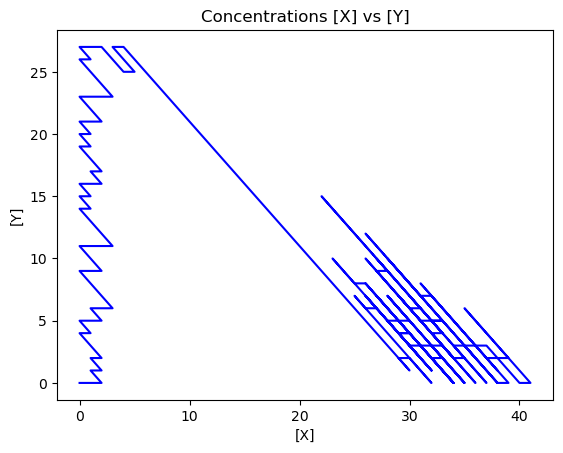

In [33]:
plt.plot(X, Y, 'b-')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Concentrations [X] vs [Y]')
plt.show()

The Gillespie simulation and ODE simulation has produced different plots. The ODE shows a steady state for both concentrations of [X] and [Y], whereas the Gillespie model struggles to produce similar results. The X,Y plot shows almost oscillatory behaviour, compared to the ODE result.

Gillespie is a stochastic simulation method, which does model randomness. It may be that for low concentrations (initial conditions 0) simulations change drastically due to this randomness.

In contrast, ODEs are deterministic and assume continous concentrations.

The ODE results appear more reliable.